<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features-Engeneering-and-Selection" data-toc-modified-id="Features-Engeneering-and-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features Engeneering and Selection</a></span><ul class="toc-item"><li><span><a href="#Split-the-Data" data-toc-modified-id="Split-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split the Data</a></span><ul class="toc-item"><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Target Encoding</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Models-For-Regression" data-toc-modified-id="Models-For-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Models For Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-Models" data-toc-modified-id="Linear-Models-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Linear Models</a></span></li><li><span><a href="#Tree-Based-Model" data-toc-modified-id="Tree-Based-Model-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Tree Based Model</a></span></li><li><span><a href="#Ensemble-Models" data-toc-modified-id="Ensemble-Models-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Ensemble Models</a></span></li><li><span><a href="#Tuninig-Lgb-model" data-toc-modified-id="Tuninig-Lgb-model-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Tuninig Lgb model</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li></ul></div>

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


pd.plotting.register_matplotlib_converters()
%matplotlib inline
from IPython.display import display
from itertools import combinations
from collections import Counter


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# pre_preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler , MinMaxScaler , RobustScaler


# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Valdiation
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold , GroupKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score , median_absolute_error , mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
# to format the scientific presntastion of numbers 
pd.options.display.float_format = '{:.2f}'.format


# Features Engeneering and Selection

In [131]:
df_clean = pd.read_csv('Clean_data2.csv')

In [132]:
df_clean.head()

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,delivery_status,customer_country,customer_id,customer_segment,market,order_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,product_category_id,product_name,shipping_mode,Month_order_date_(dateorders),Year_order_date_(dateorders)
0,CASH,2,4,88.79,Advance shipping,EE. UU.,11599,Consumer,LATAM,1,60.00,0.20,1,299.98,0.37,1,299.98,43,Diamondback Women's Serene Classic Comfort Bi,Standard Class,1,2015
1,PAYMENT,3,4,68.25,Advance shipping,EE. UU.,256,Consumer,LATAM,2,22.50,0.09,3,50.00,0.30,5,250.00,24,Nike Men's Dri-FIT Victory Golf Polo,Standard Class,1,2015
2,PAYMENT,3,4,91.18,Advance shipping,EE. UU.,256,Consumer,LATAM,2,6.00,0.03,2,199.99,0.47,1,199.99,48,Pelican Sunstream 100 Kayak,Standard Class,1,2015
3,PAYMENT,3,4,36.47,Advance shipping,EE. UU.,256,Consumer,LATAM,2,22.10,0.17,4,129.99,0.34,1,129.99,18,Nike Men's CJ Elite 2 TD Football Cleat,Standard Class,1,2015
4,CASH,5,4,33.59,Late delivery,EE. UU.,8827,Home Office,LATAM,4,39.98,0.20,8,49.98,0.21,4,199.92,46,O'Brien Men's Neoprene Life Vest,Standard Class,1,2015


## Split the Data

In [133]:
train , test , y_train , y_test = train_test_split(df_clean.drop('sales',axis=1),df_clean.sales ,
                                                   test_size=0.30, shuffle=True,random_state=45)

In [134]:
train.shape,test.shape

((126021, 21), (54010, 21))

In [135]:
# The delay in orders
for df in [train,test]:
    
    df['DelayOrdered'] = df['days_for_shipment_(scheduled)'] - df['days_for_shipping_(real)']
    df.drop(['days_for_shipment_(scheduled)','days_for_shipping_(real)'], axis=1, inplace=True)



train['DiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].max()))
test['DiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].max()))


train['DenefitPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['benefit_per_order'].mean()))
test['DenefitPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['benefit_per_order'].mean()))


train['TotalDiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].var()))
test['TotalDiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].var()))


# Example 2: Compute the standard deviation of discounts per product
train['MaxDiscountPerOrder'] = train['order_item_id'].map(dict(train.groupby('order_item_id')['order_item_discount'].max()))
test['MaxDiscountPerOrder'] = test['order_item_id'].map(dict(test.groupby('order_item_id')['order_item_discount'].max()))

In [136]:
train.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)
test.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)

In [137]:
train.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)
test.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)

### Target Encoding

`Target encoding is a feature engineering technique used to handle categorical variables by encoding them based on the target variable. Instead of assigning arbitrary numerical values to categories (like in label encoding) or creating additional features (like in one-hot encoding), target encoding uses the mean of the target variable for each category as the encoded value.`

In [138]:
colms = ['product_name']
from category_encoders import TargetEncoder
Te = TargetEncoder()
for col in colms:
    train[f"{col}_mean"] = Te.fit_transform(train[f"{col}"], y_train)
    test[f"{col}_mean"] = Te.transform(test[f"{col}"])
    
    train.drop(col , axis=1, inplace=True)
    test.drop(col , axis=1, inplace=True)    

In [139]:
train['product_name_mean'].corr(y_train)

0.8377665307298386

In [140]:
cat = train.select_dtypes(include="O").columns.to_list()
num = train.select_dtypes(exclude='O').columns.to_list()

In [141]:
train.head()

,type,delivery_status,customer_country,customer_segment,market,order_item_discount_rate,order_item_product_price,order_item_quantity,shipping_mode,Month_order_date_(dateorders),Year_order_date_(dateorders),DelayOrdered,DiscountPerProduct,DenefitPerProduct,TotalDiscountPerProduct,MaxDiscountPerOrder,product_name_mean
94431,PAYMENT,Shipping on time,EE. UU.,Corporate,USCA,0.16,399.98,1,Same Day,7,2016,0,100.00,43.83,792.81,64.00,399.98
8215,PAYMENT,Late delivery,EE. UU.,Consumer,LATAM,0.02,50.00,5,Standard Class,2,2015,-2,62.50,16.47,187.75,5.00,149.83
139964,DEBIT,Late delivery,Puerto Rico,Home Office,LATAM,0.15,299.98,1,Standard Class,3,2017,-2,75.00,31.67,449.18,45.00,299.98
163277,DEBIT,Late delivery,EE. UU.,Consumer,Europe,0.15,299.98,1,Standard Class,8,2017,-1,75.00,31.67,449.18,45.00,299.98
102864,DEBIT,Shipping on time,EE. UU.,Consumer,USCA,0.03,50.00,1,Standard Class,8,2016,0,62.50,16.47,187.75,1.50,149.83


# Modeling

## Preprocessing

In [142]:
def Preprcessing(data,numerical_col,cat_clo):
    
    

    Transformer = ColumnTransformer(
    
        transformers = [ 
    
    
        ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), numerical_col),
    
        ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat_clo)
    ],verbose_feature_names_out=False)

    data = pd.DataFrame(Transformer.fit_transform(data),columns=Transformer.get_feature_names_out())
    
    return data 

## Models For Regression

### Linear Models

1. Linear Reggression(OLS)
2. Ridge Reggression(L1 norm)
3. Lasso Reggression(L2 norm)
4. Elistic Net

In [143]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,PolynomialFeatures
from imblearn.pipeline import Pipeline

Linear_models = {
    
    "Linear Regression" : LinearRegression(),
    "Rideg" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet": ElasticNet()
}

# Linear_processer = ColumnTransformer(
    
    
#     transformers = [ 
    
    
#         ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num),
    
#         ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat)
        
    
#                                                                                 ])

# Evaluate Each Model
for name, model in Linear_models.items():
    
    # Create Pipeline
    
    pipeline = Pipeline(steps=[

        ("model", model)
    ])

    train_df = Preprcessing(train,numerical_col=num,cat_clo=cat)
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")


Model: Linear Regression
Cross-Validation RMSE: 26.69 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Rideg
Cross-Validation RMSE: 26.69 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Lasso
Cross-Validation RMSE: 26.99 (+/- 0.18)
Cross-Validation MAE: 4.31 (+/- 0.01)
Cross-Validation R2_score : 0.944

Model: ElasticNet
Cross-Validation RMSE: 42.55 (+/- 0.15)
Cross-Validation MAE: 5.62 (+/- 0.01)
Cross-Validation R2_score : 0.862



### Tree Based Model

1. Decision Tree
2. Gradint Boosting  
3. Extra Trees


        I's Known that most of the tree models were likely to overfit without any tunnig so here we adjust some parameters for meaningful results

In [31]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor,ExtraTreesRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


tree_models = {
    
    "LightGBM": LGBMRegressor(n_estimators = 200, random_state = 45, learning_rate = 0.01 ),
    
    "Decision Tree": DecisionTreeRegressor(random_state=45,max_depth=5)
    
}

tree_processer = ColumnTransformer(transformers=[
    
    
        ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num)
    
        # ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat) 
        ])

# Evaluate Each Model
for name, model in tree_models.items():
    
    # Create Pipeline
    pipeline = Pipeline(steps=[
        
        ("Processre" , tree_processer ),
                
        ("model", model)
    ])
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 11
[LightGBM] [Info] Start training from score 200.341686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100817, number of used features: 11
[LightGBM] [Info] Start training from score 200.463444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

15.59 (+/- 0.08)
Cross-Validation MAE: 3.52 (+/- 0.01)
Cross-Validation R2_score : 0.981

Model: Decision Tree
Cross-Validation RMSE: 18.06 (+/- 0.14)
Cross-Validation MAE: 3.15 (+/- 0.01)
Cross-Validation R2_score : 0.975


### Ensemble Models

1. Stacking

In [ ]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR


estimators = [
    
    ('lr', LinearRegression()),
    ('lgbm',  DecisionTreeRegressor(random_state=45,max_depth=5))]

StackModels = StackingRegressor(
    
    estimators=estimators,
    
    final_estimator= Lasso() 
)

pipeline = Pipeline(steps=[
    
    ('preprocessor', tree_processer),
    
    ("Model", StackModels)
])


# Cross-Validation
scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
rmse_scores = np.sqrt(-scores)
    
MAE_scores = np.sqrt(-scores2)
    
R2_score = np.mean(scores3)
    

print(f"Model: StackModels")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

Model: StackModels
Cross-Validation RMSE: 15.04 (+/- 0.14)
Cross-Validation MAE: 3.31 (+/- 0.01)
Cross-Validation R2_score : 0.983



**The above Resultes shows that the problem could have different solutions. Alought we gonna choose the LIGHT GBM Model since it's fast and good with momery and deployed**

# Hyperparameter Tunning

In [144]:
# Split the training data to train and validation
X_train , X_valid , train_y , valid_y = train_test_split(train , y_train, test_size=0.25 ,shuffle=True, random_state = 42)

X_train = Preprcessing(X_train,num,cat)
X_valid =  Preprcessing(X_valid,num,cat)


### Halving Gride Search

In [1]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV,HalvingGridSearchCV


# Model=  LGBMRegressor(random_state=45)

# # Define the parameter space
# param_dist = {
#     'learning_rate': [0.01],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [5],
#     'min_child_samples': [10, 20, 50,100],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [100, 200, 300],
#     'bagging_freq':[5],
#     'bagging_fraction':[0.75,0.85]
    
# }

# # Set up HalvingRandomSearchCV
# halving_search = HalvingRandomSearchCV(
#     estimator=Model,
#     param_distributions=param_dist,
#     resource='n_samples',
#     aggressive_elimination=True,
#     max_resources=400,  # Maximum number of estimators to test
#     random_state=42,
#     scoring='neg_root_mean_squared_error',  # Evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,  # Display progress
#     n_jobs=-1  # Parallelize
# )


# # Perform the search
# halving_search.fit(Train, y_train)

# #  Display the best parameters
# print("Best Parameters:", halving_search.best_params_)
# print("Best score:", halving_search.best_score_)

In [64]:
params = {'bagging_fraction': 0.5,
          'bagging_freq': 2,
          'colsample_bytree': 1.0, 
          'learning_rate': 0.01,
          'max_depth': 5,
          'min_child_samples': 10, 
          'n_estimators': 300,
          'num_leaves': 31}

### Optuna

In [ ]:
import optuna
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation

dtrain = lgb.Dataset(X_train , label = train_y)
dvalid = lgb.Dataset(X_valid , label = valid_y)


# Define objective function
def objective(trial):
    # Define hyperparameter search space
    params = {
        "objective": "regression",
        "metric": "rmse",
        # "boosting_type":'dart',
        # 'drop_rate': trial.suggest_uniform("drop_rate",0.0001 , 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 200),
        "max_depth": trial.suggest_int("max_depth", 1, 5),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        # "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        # "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),  # Include bagging_fraction
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
    }
        
    # Train LightGBM model
    model = lgb.train(params,
                train_set=dtrain,
               num_boost_round=200,
               valid_sets=[dtrain, dvalid],
        callbacks=[early_stopping(100), log_evaluation(100)],
               )

    # Predict and calculate RMSE
    preds = model.predict(X_valid)
    rmse = mean_squared_error(valid_y, preds, squared=False)
    return rmse

# Create a study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get the best parameters
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)

# # Train the final model with the best parameters
# best_params = study.best_params
# final_model = lgb.LGBMRegressor(**best_params)
# final_model.fit(X, y)


[I 2025-01-23 16:14:17,761] A new study created in memory with name: no-name-a12ae64f-c0b9-4e34-86fc-4bfd1c338cf0


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 94515, number of used features: 27
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] Found whitespace in feature_names, repla

[I 2025-01-23 16:14:20,590] Trial 0 finished with value: 17.581534805244136 and parameters: {'num_leaves': 27, 'max_depth': 2, 'learning_rate': 0.01585013656288544, 'n_estimators': 399, 'colsample_bytree': 0.6604077442432621, 'feature_fraction': 0.5766333135299668, 'bagging_fraction': 0.5550921786625123, 'bagging_freq': 5, 'reg_alpha': 1.8218049657661737, 'reg_lambda': 3.085512480419465e-05}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021138 seconds.
You can set `force_col_wise=true` to remove the ove

[I 2025-01-23 16:14:21,779] Trial 1 finished with value: 108.61040204737895 and parameters: {'num_leaves': 101, 'max_depth': 2, 'learning_rate': 0.00041865993712004735, 'n_estimators': 167, 'colsample_bytree': 0.6060318964801743, 'feature_fraction': 0.8844610939465569, 'bagging_fraction': 0.5759067640340425, 'bagging_freq': 1, 'reg_alpha': 0.0006896554331647832, 'reg_lambda': 0.9679377429740438}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[167]	training's rmse: 109.048	valid_1's rmse: 108.61
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5750165969337284, colsample_bytree=0.545935966419465 will be ignored. Current value: feature_fraction=0.5750165969337284
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ig

[I 2025-01-23 16:14:24,050] Trial 2 finished with value: 103.24133043624181 and parameters: {'num_leaves': 163, 'max_depth': 5, 'learning_rate': 0.0007293430052651221, 'n_estimators': 154, 'colsample_bytree': 0.545935966419465, 'feature_fraction': 0.5750165969337284, 'bagging_fraction': 0.9948255129245999, 'bagging_freq': 8, 'reg_alpha': 2.686370277118526e-08, 'reg_lambda': 0.06438120223023067}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:25,505] Trial 3 finished with value: 3.74056387991811 and parameters: {'num_leaves': 64, 'max_depth': 5, 'learning_rate': 0.07069840370458388, 'n_estimators': 99, 'colsample_bytree': 0.8547271495658112, 'feature_fraction': 0.8984347664100713, 'bagging_fraction': 0.9640275602742624, 'bagging_freq': 6, 'reg_alpha': 1.2054500504569427e-08, 'reg_lambda': 0.020342765827849503}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[78]	training's rmse: 1.836	valid_1's rmse: 3.74056
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5119162346732761, colsample_bytree=0.8446371565317095 will be ignored. Current value: feature_fraction=0.5119162346732761
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5119162346732761, colsample_bytree=0.844637156

[I 2025-01-23 16:14:27,678] Trial 4 finished with value: 109.22452671428094 and parameters: {'num_leaves': 72, 'max_depth': 2, 'learning_rate': 0.00019360193873912152, 'n_estimators': 336, 'colsample_bytree': 0.8446371565317095, 'feature_fraction': 0.5119162346732761, 'bagging_fraction': 0.6949833296824799, 'bagging_freq': 7, 'reg_alpha': 0.07323663649687387, 'reg_lambda': 0.5274698668139831}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003099 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:31,965] Trial 5 finished with value: 23.334901897397117 and parameters: {'num_leaves': 123, 'max_depth': 4, 'learning_rate': 0.005132559117481294, 'n_estimators': 400, 'colsample_bytree': 0.7316560263034716, 'feature_fraction': 0.5930860873984158, 'bagging_fraction': 0.5564814971479042, 'bagging_freq': 4, 'reg_alpha': 3.808103139327689e-05, 'reg_lambda': 1.5574821092629536e-08}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003546 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2025-01-23 16:14:33,799] Trial 6 finished with value: 78.14859709673424 and parameters: {'num_leaves': 185, 'max_depth': 2, 'learning_rate': 0.0037437352644476576, 'n_estimators': 168, 'colsample_bytree': 0.740074235536245, 'feature_fraction': 0.6523953052799387, 'bagging_fraction': 0.7368939215079142, 'bagging_freq': 10, 'reg_alpha': 1.2361067382359843e-05, 'reg_lambda': 0.00035409181759619724}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[168]	training's rmse: 78.3039	valid_1's rmse: 78.1486
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8621922393982384, colsample_bytree=0.5067504511157401 will be ignored. Current value: feature_fraction=0.8621922393982384
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8621922393982384, colsample_bytree=0.506750

[I 2025-01-23 16:14:34,528] Trial 7 finished with value: 100.09123809034567 and parameters: {'num_leaves': 60, 'max_depth': 2, 'learning_rate': 0.001633523123600866, 'n_estimators': 118, 'colsample_bytree': 0.5067504511157401, 'feature_fraction': 0.8621922393982384, 'bagging_fraction': 0.6282049319206995, 'bagging_freq': 5, 'reg_alpha': 1.3820837259017629, 'reg_lambda': 0.0007560533250270373}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:36,619] Trial 8 finished with value: 36.63551967015843 and parameters: {'num_leaves': 177, 'max_depth': 2, 'learning_rate': 0.008104473172478033, 'n_estimators': 315, 'colsample_bytree': 0.6985406220287431, 'feature_fraction': 0.8046335044435081, 'bagging_fraction': 0.856959397509413, 'bagging_freq': 9, 'reg_alpha': 0.40695802084487326, 'reg_lambda': 1.2628734141318467e-05}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007818 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:39,067] Trial 9 finished with value: 75.79105809917831 and parameters: {'num_leaves': 85, 'max_depth': 3, 'learning_rate': 0.0017829810665338894, 'n_estimators': 297, 'colsample_bytree': 0.5063047136987173, 'feature_fraction': 0.7291133788726731, 'bagging_fraction': 0.8459896013999305, 'bagging_freq': 7, 'reg_alpha': 0.012993937312802089, 'reg_lambda': 2.121686619803964e-08}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002976 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:40,263] Trial 10 finished with value: 2.2751855263247096 and parameters: {'num_leaves': 24, 'max_depth': 5, 'learning_rate': 0.07708783898086707, 'n_estimators': 70, 'colsample_bytree': 0.9781765520430907, 'feature_fraction': 0.9505597560719174, 'bagging_fraction': 0.9929875868342963, 'bagging_freq': 2, 'reg_alpha': 3.997504298977612e-08, 'reg_lambda': 0.029307636096734944}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[70]	training's rmse: 1.74939	valid_1's rmse: 2.27519
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[I 2025-01-23 16:14:41,175] Trial 11 finished with value: 3.2139444090568983 and parameters: {'num_leaves': 19, 'max_depth': 5, 'learning_rate': 0.08913551021301372, 'n_estimators': 52, 'colsample_bytree': 0.9914780355295882, 'feature_fraction': 0.9807918113210001, 'bagging_fraction': 0.995491635503673, 'bagging_freq': 2, 'reg_alpha': 1.523576127031915e-08, 'reg_lambda': 0.021013112196485526}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[52]	training's rmse: 2.70904	valid_1's rmse: 3.21394
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[I 2025-01-23 16:14:43,114] Trial 12 finished with value: 3.936129016740796 and parameters: {'num_leaves': 15, 'max_depth': 4, 'learning_rate': 0.08816527413917909, 'n_estimators': 50, 'colsample_bytree': 0.9971569310820624, 'feature_fraction': 0.9905717169581174, 'bagging_fraction': 0.8971160854891206, 'bagging_freq': 1, 'reg_alpha': 6.674414515434798e-07, 'reg_lambda': 0.013346507050841169}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[50]	training's rmse: 3.38077	valid_1's rmse: 3.93613
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Info] Auto-choosing row-wise multi-threading

[I 2025-01-23 16:14:44,937] Trial 13 finished with value: 18.118100626079173 and parameters: {'num_leaves': 34, 'max_depth': 4, 'learning_rate': 0.035271210918527335, 'n_estimators': 60, 'colsample_bytree': 0.994699511097473, 'feature_fraction': 0.9735548208465703, 'bagging_fraction': 0.9383774160757439, 'bagging_freq': 3, 'reg_alpha': 3.6963789044974833e-07, 'reg_lambda': 4.1423790268301675}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008591 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:50,270] Trial 14 finished with value: 2.3370090521677334 and parameters: {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.025071228615788862, 'n_estimators': 231, 'colsample_bytree': 0.9053621112263595, 'feature_fraction': 0.9408625228086755, 'bagging_fraction': 0.8093274368363745, 'bagging_freq': 3, 'reg_alpha': 2.1008113292236908e-07, 'reg_lambda': 0.005390619557061702}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:53,559] Trial 15 finished with value: 6.061204935428799 and parameters: {'num_leaves': 46, 'max_depth': 4, 'learning_rate': 0.02298285341187206, 'n_estimators': 244, 'colsample_bytree': 0.8942900485795127, 'feature_fraction': 0.7688032862944889, 'bagging_fraction': 0.8116354422613323, 'bagging_freq': 3, 'reg_alpha': 6.061630155123856e-07, 'reg_lambda': 1.807636563274082e-06}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005228 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:56,316] Trial 16 finished with value: 60.18573599931825 and parameters: {'num_leaves': 130, 'max_depth': 1, 'learning_rate': 0.011678912826045476, 'n_estimators': 223, 'colsample_bytree': 0.9201726679016947, 'feature_fraction': 0.9379544437182041, 'bagging_fraction': 0.7712771497421694, 'bagging_freq': 3, 'reg_alpha': 8.337360139059193e-06, 'reg_lambda': 0.0022864272205410235}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[223]	training's rmse: 60.2601	valid_1's rmse: 60.18

[I 2025-01-23 16:15:01,334] Trial 17 finished with value: 5.253889896774529 and parameters: {'num_leaves': 48, 'max_depth': 5, 'learning_rate': 0.03272343385460823, 'n_estimators': 224, 'colsample_bytree': 0.8061316274868927, 'feature_fraction': 0.8249749852918986, 'bagging_fraction': 0.6895607570326828, 'bagging_freq': 2, 'reg_alpha': 0.000599634264506342, 'reg_lambda': 0.196967406286807}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006137 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:05,641] Trial 18 finished with value: 10.072296139139956 and parameters: {'num_leaves': 98, 'max_depth': 3, 'learning_rate': 0.030052100723061817, 'n_estimators': 261, 'colsample_bytree': 0.9338543312705934, 'feature_fraction': 0.7127364676219992, 'bagging_fraction': 0.9053017797246972, 'bagging_freq': 4, 'reg_alpha': 1.260320708096716e-07, 'reg_lambda': 3.4796332717253e-05}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014109 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2025-01-23 16:15:13,014] Trial 19 finished with value: 1.401860326673886 and parameters: {'num_leaves': 43, 'max_depth': 5, 'learning_rate': 0.0490246128778572, 'n_estimators': 210, 'colsample_bytree': 0.7959754525661736, 'feature_fraction': 0.934914901145026, 'bagging_fraction': 0.7870542357729087, 'bagging_freq': 2, 'reg_alpha': 5.895947062773945e-06, 'reg_lambda': 8.664450587419479}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003156 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:15,627] Trial 20 finished with value: 3.8758536213718946 and parameters: {'num_leaves': 129, 'max_depth': 4, 'learning_rate': 0.05218901535992249, 'n_estimators': 110, 'colsample_bytree': 0.8068818370037485, 'feature_fraction': 0.8405247083234543, 'bagging_fraction': 0.6271607739945094, 'bagging_freq': 1, 'reg_alpha': 2.7924981348163633e-06, 'reg_lambda': 2.2886454649910366}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046701 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:21,225] Trial 21 finished with value: 2.7393217179567593 and parameters: {'num_leaves': 11, 'max_depth': 5, 'learning_rate': 0.045676902000238224, 'n_estimators': 184, 'colsample_bytree': 0.9275432905382262, 'feature_fraction': 0.9284613077505967, 'bagging_fraction': 0.8027004076372856, 'bagging_freq': 2, 'reg_alpha': 3.699386748335735e-05, 'reg_lambda': 0.004793471678103882}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009448 seconds.
You can set `force_row_wise=true` to remove the overhe

In [131]:
optuna_params = study.best_params

# Model Training

In [ ]:

# Using 5 Folds cross validation whith the light gbm model.
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation

# dtrain = lgb.Dataset(X_train , label = train_y)
# dvalid = lgb.Dataset(X_valid , label = valid_y)
RMSE_val_scores = []
RMSE_train_scores = []

R2_val_scores = []
R2_train_scores = []

kf = KFold(n_splits=5,shuffle=True,random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(Train,y_train)):

    print(f"Fold {fold+1}")
    
    d_train, Y_train = Train.iloc[train_index], y_train.iloc[train_index]
    d_val, Y_val = Train.iloc[val_index], y_train.iloc[val_index]

    # d_train = tree_processer.fit_transform(d_train)
    # d_val = tree_processer.transform(d_val)
    
    dtrain = lgb.Dataset(d_train , label = Y_train)
    dvalid = lgb.Dataset(d_val , label = Y_val)

    model_1 = lgb.train(optuna_params,
                     train_set = dtrain,
                      valid_sets=[dtrain, dvalid],
                      callbacks=[early_stopping(100), log_evaluation(100)])
    
    
    val_perd = model_1.predict(d_val)
    train_perd = model_1.predict(d_train)

    val_RMSE = np.sqrt(mean_squared_error(val_perd,Y_val))
    train_RMSE = np.sqrt(mean_squared_error(train_perd,Y_train))

    val_r2 = r2_score(val_perd,Y_val)
    train_r2 = r2_score(train_perd,Y_train)

    print(25*"--")
    
    
    print(f"Training RMSE:{train_RMSE:.3f}")
    print(f"Valsiation RMSE:{val_RMSE:.3f}")

    print(f"Training R2_score:{val_r2:.3f}")
    print(f"Training R2_scor:{val_r2:.3f}")

    print(25*"--")
    
    RMSE_val_scores.append(val_RMSE)
    RMSE_train_scores.append(train_RMSE)
    
    R2_val_scores.append(val_r2)
    R2_train_scores.append(train_r2)    
    

print(f"Cross Val RMSE: {np.mean(RMSE_val_scores):.4f}")
print(f"Cross Val RMSE train: {np.mean(RMSE_train_scores):.4f}")

print(f"Cross Val R2_score: {np.mean(R2_val_scores):.4f}")
print(f"Cross Val RMSE R2_score: {np.mean(R2_train_scores):.4f}")

Fold 1
[LightGBM] [Warning] feature_fraction is set=0.9620826377219402, colsample_bytree=0.7528253651723684 will be ignored. Current value: feature_fraction=0.9620826377219402
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9620826377219402, colsample_bytree=0.7528253651723684 will be ignored. Current value: feature_fraction=0.9620826377219402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 27
[LightGBM] [Warning] feature_fraction is set=0.9620826377219402, colsample_bytree=0.7528253651723684 will be ignored. Current value: feature_fraction=0.9620826377219402
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from

In [ ]:
X_test = pd.DataFrame(tree_processer.fit_transform(test),columns=tree_processer.get_feature_names_out())


prediction = model_1.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,prediction))}")
print(f"RMSE: {np.sqrt(mean_absolute_error(y_test,prediction))}")
print(f"R2_score: {r2_score(y_test,prediction)}")

RMSE: 4.299185846488911
RMSE: 1.5181591079727537
R2_score: 0.9985842138546492


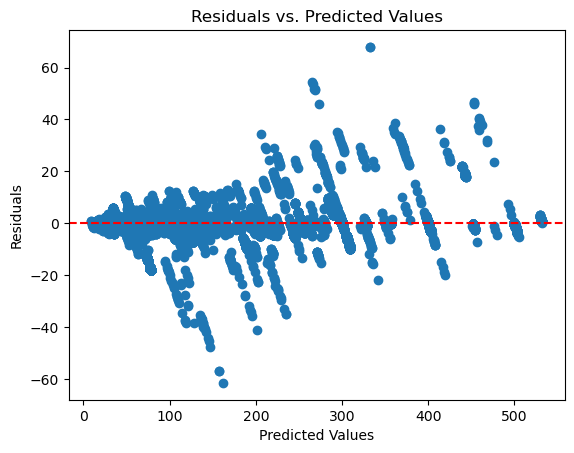

In [ ]:
residuals =   y_test - prediction
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

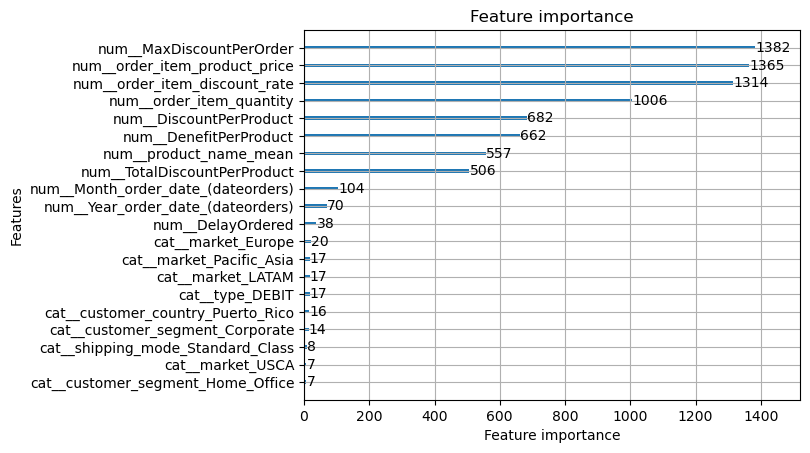

In [129]:
import matplotlib.pyplot as plt
lgb.plot_importance(model_1, max_num_features=20)
plt.show()

# Results Interpertaion

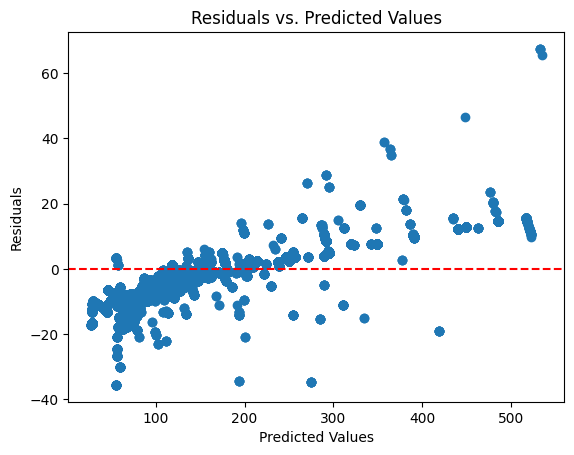

In [ ]:
residuals =   y_test - prediction
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

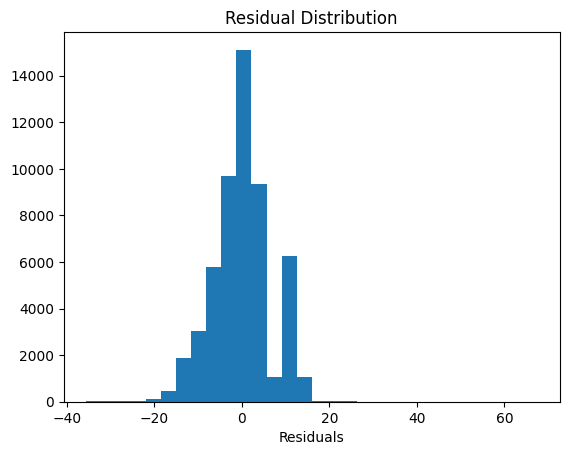

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()